a.x=-0.6666666666666666
a.x=0.33333333333333337


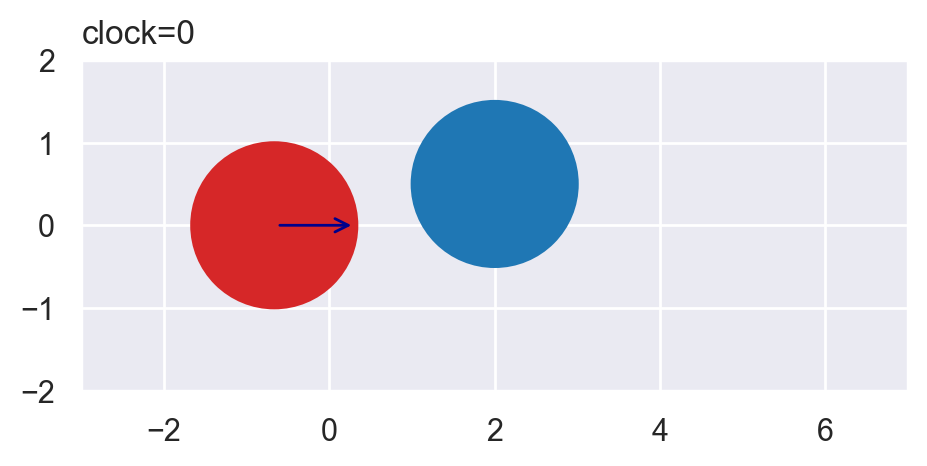

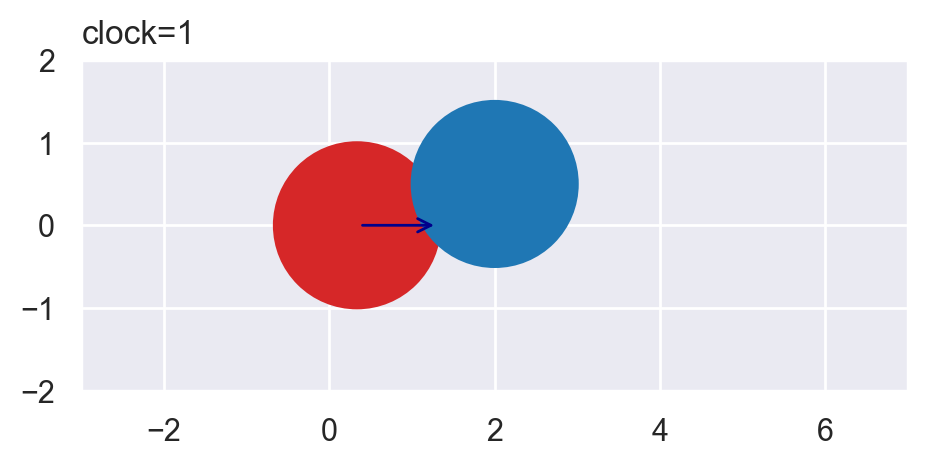

In [9]:
# Show what happens when you increment time by a fixed amount

from perfect_physics import Circle, World

a = Circle(x=-2/3, y=0, r=1, vx=1, vy=0, m=1)
b = Circle(x=2, y=1/2, r=1, vx=0, vy=0, m=1)
world = World([a, b], [],  xlim=(-3, 7), ylim=(-2, 2))
world.show(colors=["tab:red", "tab:blue"], font_scale=2)
print(f"a.x={float(a.x)}")
world._tick_no_collision(1)
world.show(colors=["tab:red", "tab:blue"], font_scale=2)
print(f"a.x={float(a.x)}")
pass

In [4]:
import numpy as np
from ipywidgets import interact
import seaborn as sns
from matplotlib import patches
from matplotlib import pyplot as plt

a_x = -2/3; a_y = 0; a_vx = 1; a_vy = 0; a_r = 1
b_x = 2; b_y = 1; b_vx = 1/2; b_vy = -1/2; b_r = 1

def f(t):
    aprime_x = a_x + a_vx * t
    aprime_y = a_y + a_vy * t
    bprime_x = b_x + b_vx * t
    bprime_y = b_y + b_vy * t
    distance = np.sqrt((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2)
    print(f"distance {distance} =?= {a_r + b_r}")

    sns.set()
    figure, axes = plt.subplots()
    axes.set_aspect(1)
    axes.set_xlim(-3.0, 7.0)
    axes.set_ylim(-2.0, 3.0)
    axes.add_patch(patches.Circle((aprime_x, aprime_y), a_r, color="tab:red"))
    axes.add_patch(patches.Circle((bprime_x, bprime_y), a_r, color="tab:blue"))

interact(f, t=(-1, 6, .1), continuous_update=False)

interactive(children=(FloatSlider(value=2.0, description='t', max=6.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.f(t)>

In [22]:
from sympy import symbols, Eq, nonlinsolve, S, sqrt

t = symbols("t") # define symbols
a_x, a_y, a_vx, a_vy, a_r, aprime_x, aprime_y = symbols(
    "a_x, a_y, a_vx, a_vy, a_r, a'_x, a'_y"
)
b_x, b_y, b_vx, b_vy, b_r, bprime_x, bprime_y = symbols(
    "b_x, b_y, b_vx, b_vy, b_r, b'_x, b'_y"
)

# define equations
eq1 = Eq(aprime_x, a_x + a_vx * t)
eq2 = Eq(aprime_y, a_y + a_vy * t)
eq3 = Eq(bprime_x, b_x + b_vx * t)
eq4 = Eq(bprime_y, b_y + b_vy * t)
eq5 = Eq((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2, (a_r + b_r) ** 2)

cc_all_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5], t, aprime_x, aprime_y, bprime_x, bprime_y)
cc_time_solutions = [t for t, aprime_x, ap_y, bp_x, bp_y in cc_all_solutions]
cc_time_solutions[0]

(-a_vx*a_x + a_vx*b_x - a_vy*a_y + a_vy*b_y + a_x*b_vx + a_y*b_vy - b_vx*b_x - b_vy*b_y + sqrt(a_r**2*a_vx**2 - 2*a_r**2*a_vx*b_vx + a_r**2*a_vy**2 - 2*a_r**2*a_vy*b_vy + a_r**2*b_vx**2 + a_r**2*b_vy**2 + 2*a_r*a_vx**2*b_r - 4*a_r*a_vx*b_r*b_vx + 2*a_r*a_vy**2*b_r - 4*a_r*a_vy*b_r*b_vy + 2*a_r*b_r*b_vx**2 + 2*a_r*b_r*b_vy**2 - a_vx**2*a_y**2 + 2*a_vx**2*a_y*b_y + a_vx**2*b_r**2 - a_vx**2*b_y**2 + 2*a_vx*a_vy*a_x*a_y - 2*a_vx*a_vy*a_x*b_y - 2*a_vx*a_vy*a_y*b_x + 2*a_vx*a_vy*b_x*b_y - 2*a_vx*a_x*a_y*b_vy + 2*a_vx*a_x*b_vy*b_y + 2*a_vx*a_y**2*b_vx - 4*a_vx*a_y*b_vx*b_y + 2*a_vx*a_y*b_vy*b_x - 2*a_vx*b_r**2*b_vx + 2*a_vx*b_vx*b_y**2 - 2*a_vx*b_vy*b_x*b_y - a_vy**2*a_x**2 + 2*a_vy**2*a_x*b_x + a_vy**2*b_r**2 - a_vy**2*b_x**2 + 2*a_vy*a_x**2*b_vy - 2*a_vy*a_x*a_y*b_vx + 2*a_vy*a_x*b_vx*b_y - 4*a_vy*a_x*b_vy*b_x + 2*a_vy*a_y*b_vx*b_x - 2*a_vy*b_r**2*b_vy - 2*a_vy*b_vx*b_x*b_y + 2*a_vy*b_vy*b_x**2 - a_x**2*b_vy**2 + 2*a_x*a_y*b_vx*b_vy - 2*a_x*b_vx*b_vy*b_y + 2*a_x*b_vy**2*b_x - a_y**2*b_vx**2

In [23]:
ts = [
    t.subs(
        {
            a_x: S(-2) / 3,
            a_y: 0,
            a_vx: 1,
            a_vy: 0,
            a_r: 1,
            b_x: 2,
            b_y: 1,
            b_vx: S(1) / 2,
            b_vy: S(-1) / 2,
            b_r: 1,
        }
    )
    for t in cc_time_solutions
]
print(ts)
print([float(t) for t in ts])


[sqrt(47)/3 + 11/3, 11/3 - sqrt(47)/3]
[5.951884866800348, 1.3814484665329854]


In [17]:
float(sqrt(47)/3 + 11/3), float(11/3 - sqrt(47)/3)

(5.951884866800348, 1.3814484665329851)

In [3]:
from sympy import symbols, Eq, sqrt
a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy = symbols("a_x, a_y, a_vx, a_vy, a_r, a_m, ahat_vx, ahat_vy")
b_x, b_y, b_vx, b_vy, b_r, b_m, bhat_vx, bhat_vy = symbols("b_x, b_y, b_vx, b_vy, b_r, b_m, bhat_vx, bhat_vy")


# conservation of energy
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2
eq1 = Eq(energy_before, energy_after)

# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx, a_m * ahat_vx + b_m * bhat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy, a_m * ahat_vy + b_m * bhat_vy)

# conservation of glancing velocity
d = sqrt((b_x-a_x)**2 + (b_y-a_y)**2)
ux = -(b_y-a_y)/d
uy = (b_x-a_x)/d
eq4 = Eq((b_vx - a_vx) * ux + (b_vy - a_vy) * uy, (bhat_vx-ahat_vx) * ux + (bhat_vy-ahat_vy) * uy)

In [ ]:
from sympy import Rational, sqrt
from perfect_physics import Circle, World
from pathlib import Path

root = Path("M:/projects/perfect_physics")

for seed in range(2):
    left = Circle(x=-3, y=0, r=1, vx=1, vy=0, m=1)
    middle = Circle(x=0, y=0, r=1, vx=0, vy=0, m=1)
    right = Circle(x=4, y=0, r=2, vx=-1, vy=0, m=4)
    world = World([left, middle, right], xlim=(-10, 10), ylim=(-3, 3), rng=seed)
    # world.run_in_place(4,show=True, font_scale=1)
    print(f"seed={seed},vx={[circle.vx for circle in world.circle_list]}")

    folder = root / f"part5/pydata/three_line.{seed}"
    world.run_to_file(folder, 20)
    World.render(folder, fps=120, speed_up=.5, draw_radius=0.9)
pass


left 1, middle 0, right -1
left 0, middle 1, right -1
left 0, middle -11/5, right -1/5
left -11/5, middle 0, right -1/5
left -11/5, middle -8/25, right -3/25
left -11/5, middle -8/25, right -3/25
left 1, middle 0, right -1
left 1, middle -8/5, right -3/5
left -8/5, middle 1, right -3/5
left -8/5, middle -39/25, right 1/25
left -8/5, middle -39/25, right 1/25
left -8/5, middle -39/25, right 1/25


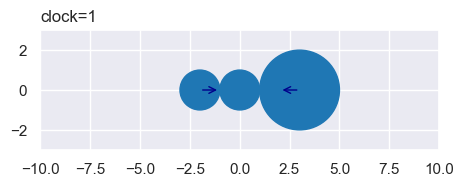

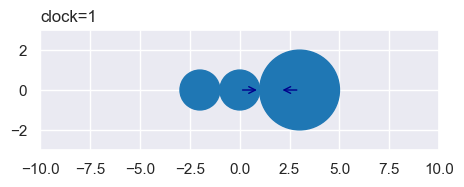

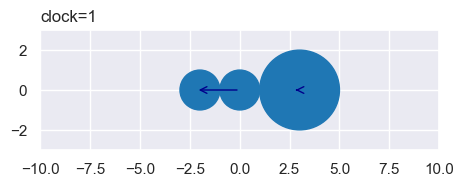

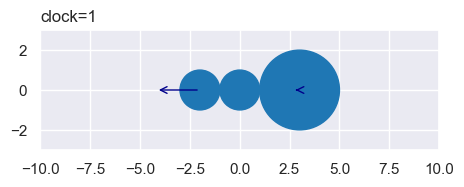

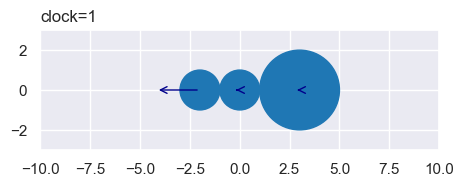

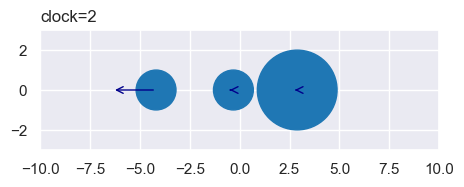

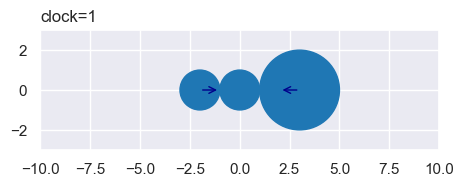

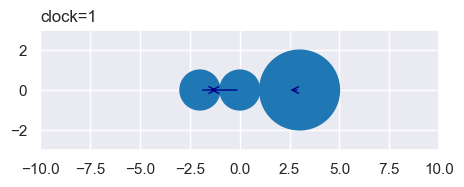

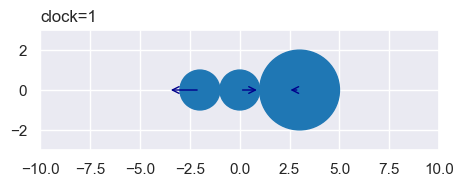

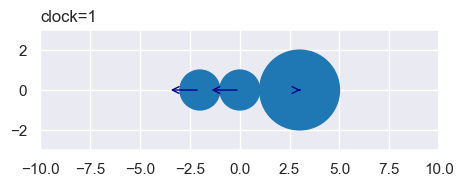

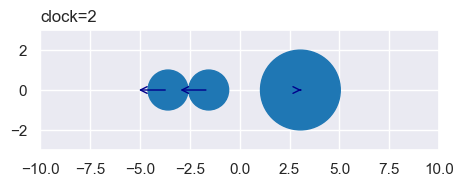

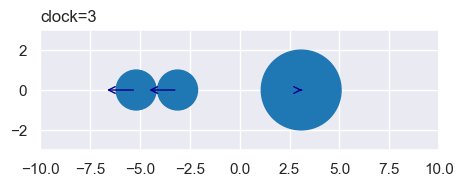

In [12]:
import numpy as np
from perfect_physics import World, Circle, Timeline
from pathlib import Path
import logging

# logging.basicConfig(level=logging.INFO)

root = Path("M:/projects/perfect_physics")
for index in range(0,2):
    left = Circle(x=-3, y=0, r=1, vx=1, vy=0, m=1, id="left")
    middle = Circle(x=0, y=0, r=1, vx=0, vy=0, m=1, id="middle")
    right = Circle(x=4, y=0, r=2, vx=-1, vy=0, m=4, id="right")
    hint_ssca_list = []
    world = World([left, middle, right], xlim=(-10, 10), ylim=(-3, 3), rng=0)
    ss_calist, _ = world._tick(Timeline(), [])
    s0, s1, calist = ss_calist
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock([s0, s1, calist[index:index+1]], [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    # world.show()
    # print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    # world.show()
    # print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    world._tock(ss_calist, [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")
    ss_calist, _ = world._tick(Timeline(), [])
    world.show()
    print(f"left {left.vx}, middle {middle.vx}, right {right.vx}")

    pass


In [11]:
from sympy import symbols, Eq, nonlinsolve
a_vx, a_m, ahat_vx =  symbols("a_vx, a_m, ahat_vx")
b_vx, b_m, bhat_vx =  symbols("b_vx, b_m, bhat_vx")
c_vx, c_m, chat_vx =  symbols("c_vx, c_m, chat_vx")

# conservation of energy
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
# conservation of momentum (x)
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)

three_in_a_row = nonlinsolve([eq1, eq2], [bhat_vx, chat_vx])


In [49]:
ahat_vx

ahat_vx

918


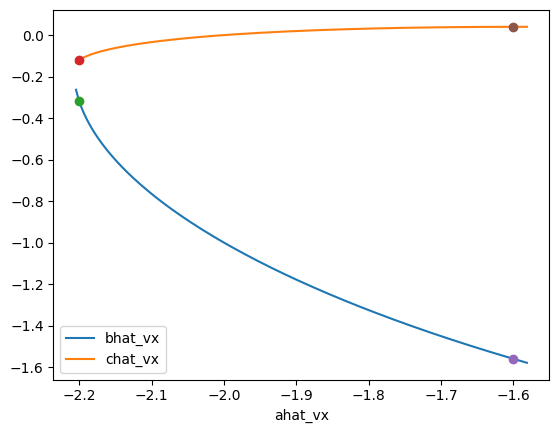

174


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import S

details = {a_m:1, b_m:1, c_m:4, a_vx:1, b_vx:0, c_vx:-1}
game = [[-11/5,-8/25,-3/25],[-8/5,-39/25, 1/25]]
a = np.linspace(-2.5,1.1,1000)
for b, c in list(three_in_a_row):
    b = np.array([b.subs(details).subs("ahat_vx", ai) for ai in a])
    c = np.array([c.subs(details).subs("ahat_vx", ai) for ai in a])
    b_mask = [np.isreal(complex(bi)) for bi in b]
    c_mask = [np.isreal(complex(ci)) for ci in c]
    bc_mask = np.logical_and(b_mask, c_mask)
    a = np.array(a[bc_mask])
    b = np.array(b[bc_mask])
    c = np.array(c[bc_mask])
    order_mask =np.array([ai <= bi <= ci for ai, bi, ci in zip(a, b, c)], dtype=bool)
    print(len(order_mask))
    a = a[order_mask]
    b = b[order_mask]
    c = c[order_mask]
    
    if len(a) == 0:
        continue

    plt.plot(a,b, label="bhat_vx")
    plt.plot(a,c, label="chat_vx")
    plt.legend()
    plt.xlabel("ahat_vx")



    for ag, bg, cg in game:
        plt.plot(ag, bg,  marker="o", linestyle='none')
        plt.plot(ag, cg,  marker="o", linestyle='none')

    plt.show()
    
    

In [43]:
order_mask

array([True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=object)

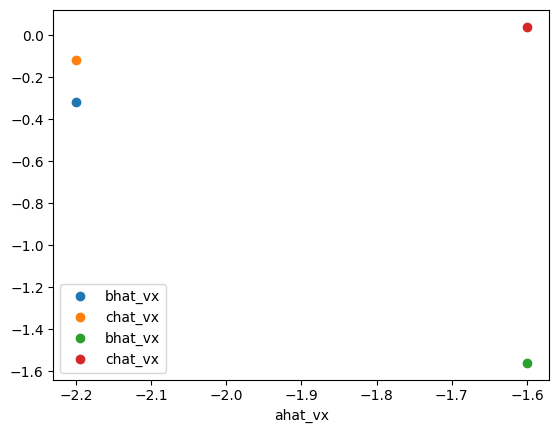

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import S


game = [[-11/5,-8/25,-3/25],[-8/5,-39/25, 1/25]]

for a, b, c in game:
    plt.plot(a, b,  label="bhat_vx", marker="o", linestyle='none')
    plt.plot(a, c, label="chat_vx", marker="o", linestyle='none')
    plt.legend()
    plt.xlabel("ahat_vx")
plt.show()

In [13]:
bs.subs("ahat_vx",0)

-11/5

In [39]:
arr = np.array([1+2j, 3+4j, 5+6j])

# Test whether each element of the array is real
is_real = np.isreal(arr)

print(is_real)

[False False False]
